In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [6]:
df=pd.read_csv('/content/drive/MyDrive/CSE475 LAB/diabetes_data.csv')

In [7]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41.0,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48.0,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58.0,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32.0,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [8]:
df.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41.0,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55.0,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57.0,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66.0,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67.0,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70.0,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 495 non-null    float64
 1   Gender              504 non-null    object 
 2   Polyuria            520 non-null    object 
 3   Polydipsia          520 non-null    object 
 4   sudden weight loss  520 non-null    object 
 5   weakness            520 non-null    object 
 6   Polyphagia          520 non-null    object 
 7   Genital thrush      520 non-null    object 
 8   visual blurring     520 non-null    object 
 9   Itching             520 non-null    object 
 10  Irritability        520 non-null    object 
 11  delayed healing     520 non-null    object 
 12  partial paresis     520 non-null    object 
 13  muscle stiffness    491 non-null    object 
 14  Alopecia            520 non-null    object 
 15  Obesity             520 non-null    object 
 16  class   

In [10]:
duplicate = df[df.duplicated()]
duplicate

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
159,38.0,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
160,28.0,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive
161,68.0,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
162,35.0,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive
163,45.0,Female,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,53.0,Male,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
497,47.0,Male,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,Yes,Negative
498,68.0,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
499,64.0,Male,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Negative


# **EXPLORATORY DATA ANALYSIS BEFORE PREPROCESSING:**

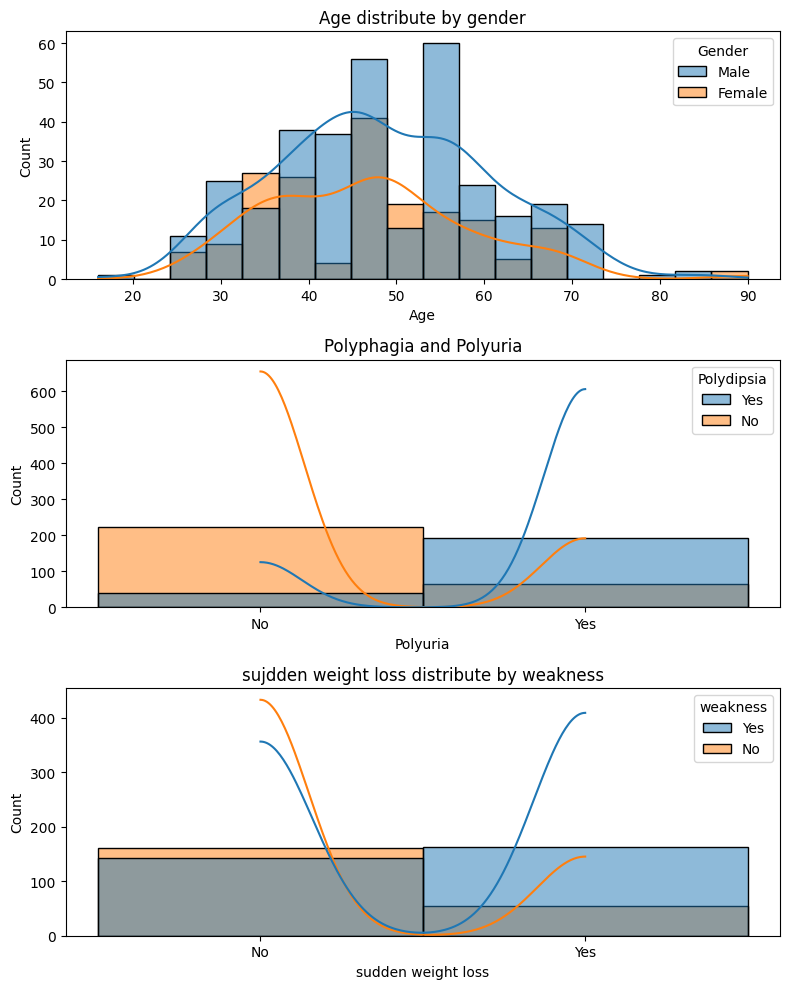

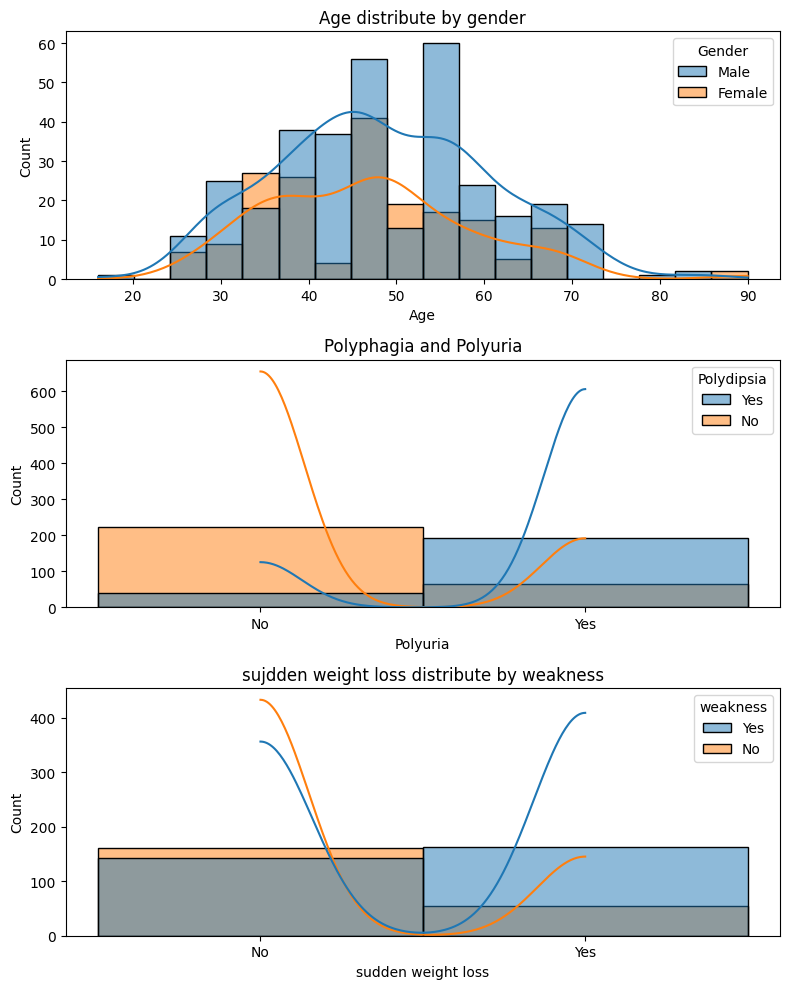

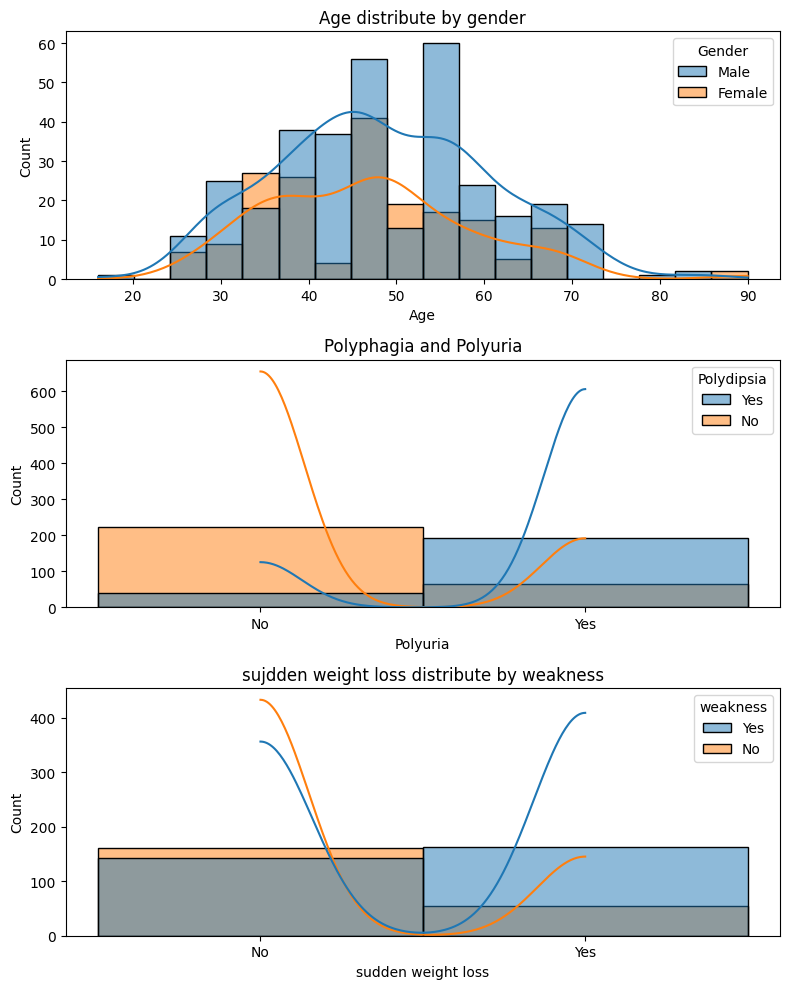

In [81]:
# Histplot of gender, smoking_history, and diabetes (categorical columns)
plt.figure(figsize=(8, 10))

# Plot for gender
plt.subplot(3, 1, 1)
sns.histplot(df, x='Age', hue='Gender', kde=True)
plt.title('Age distribute by gender')

# Plot for smoking_history
plt.subplot(3, 1, 2)
sns.histplot(df, x='Polyuria', hue='Polydipsia', kde=True)
plt.title('Polyphagia and Polyuria')

# Plot for diabetes status
plt.subplot(3, 1, 3)
sns.histplot(df, x='sudden weight loss', hue='weakness', kde=True)
plt.title('sujdden weight loss distribute by weakness')

# Show plots
plt.tight_layout()
plt.show()



# Histplot of gender, smoking_history, and diabetes (categorical columns)
plt.figure(figsize=(8, 10))

# Plot for gender
plt.subplot(3, 1, 1)
sns.histplot(df, x='Age', hue='Gender', kde=True)
plt.title('Age distribute by gender')

# Plot for smoking_history
plt.subplot(3, 1, 2)
sns.histplot(df, x='Polyuria', hue='Polydipsia', kde=True)
plt.title('Polyphagia and Polyuria')

# Plot for diabetes status
plt.subplot(3, 1, 3)
sns.histplot(df, x='sudden weight loss', hue='weakness', kde=True)
plt.title('sujdden weight loss distribute by weakness')

# Show plots
plt.tight_layout()
plt.show()


# Histplot of gender, smoking_history, and diabetes (categorical columns)
plt.figure(figsize=(8, 10))

# Plot for gender
plt.subplot(3, 1, 1)
sns.histplot(df, x='Age', hue='Gender', kde=True)
plt.title('Age distribute by gender')

# Plot for smoking_history
plt.subplot(3, 1, 2)
sns.histplot(df, x='Polyuria', hue='Polydipsia', kde=True)
plt.title('Polyphagia and Polyuria')

# Plot for diabetes status
plt.subplot(3, 1, 3)
sns.histplot(df, x='sudden weight loss', hue='weakness', kde=True)
plt.title('sujdden weight loss distribute by weakness')
# Show plots
plt.tight_layout()
plt.show()

In [11]:
df.isnull().sum()

,0
Age,25
Gender,16
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


<Axes: >

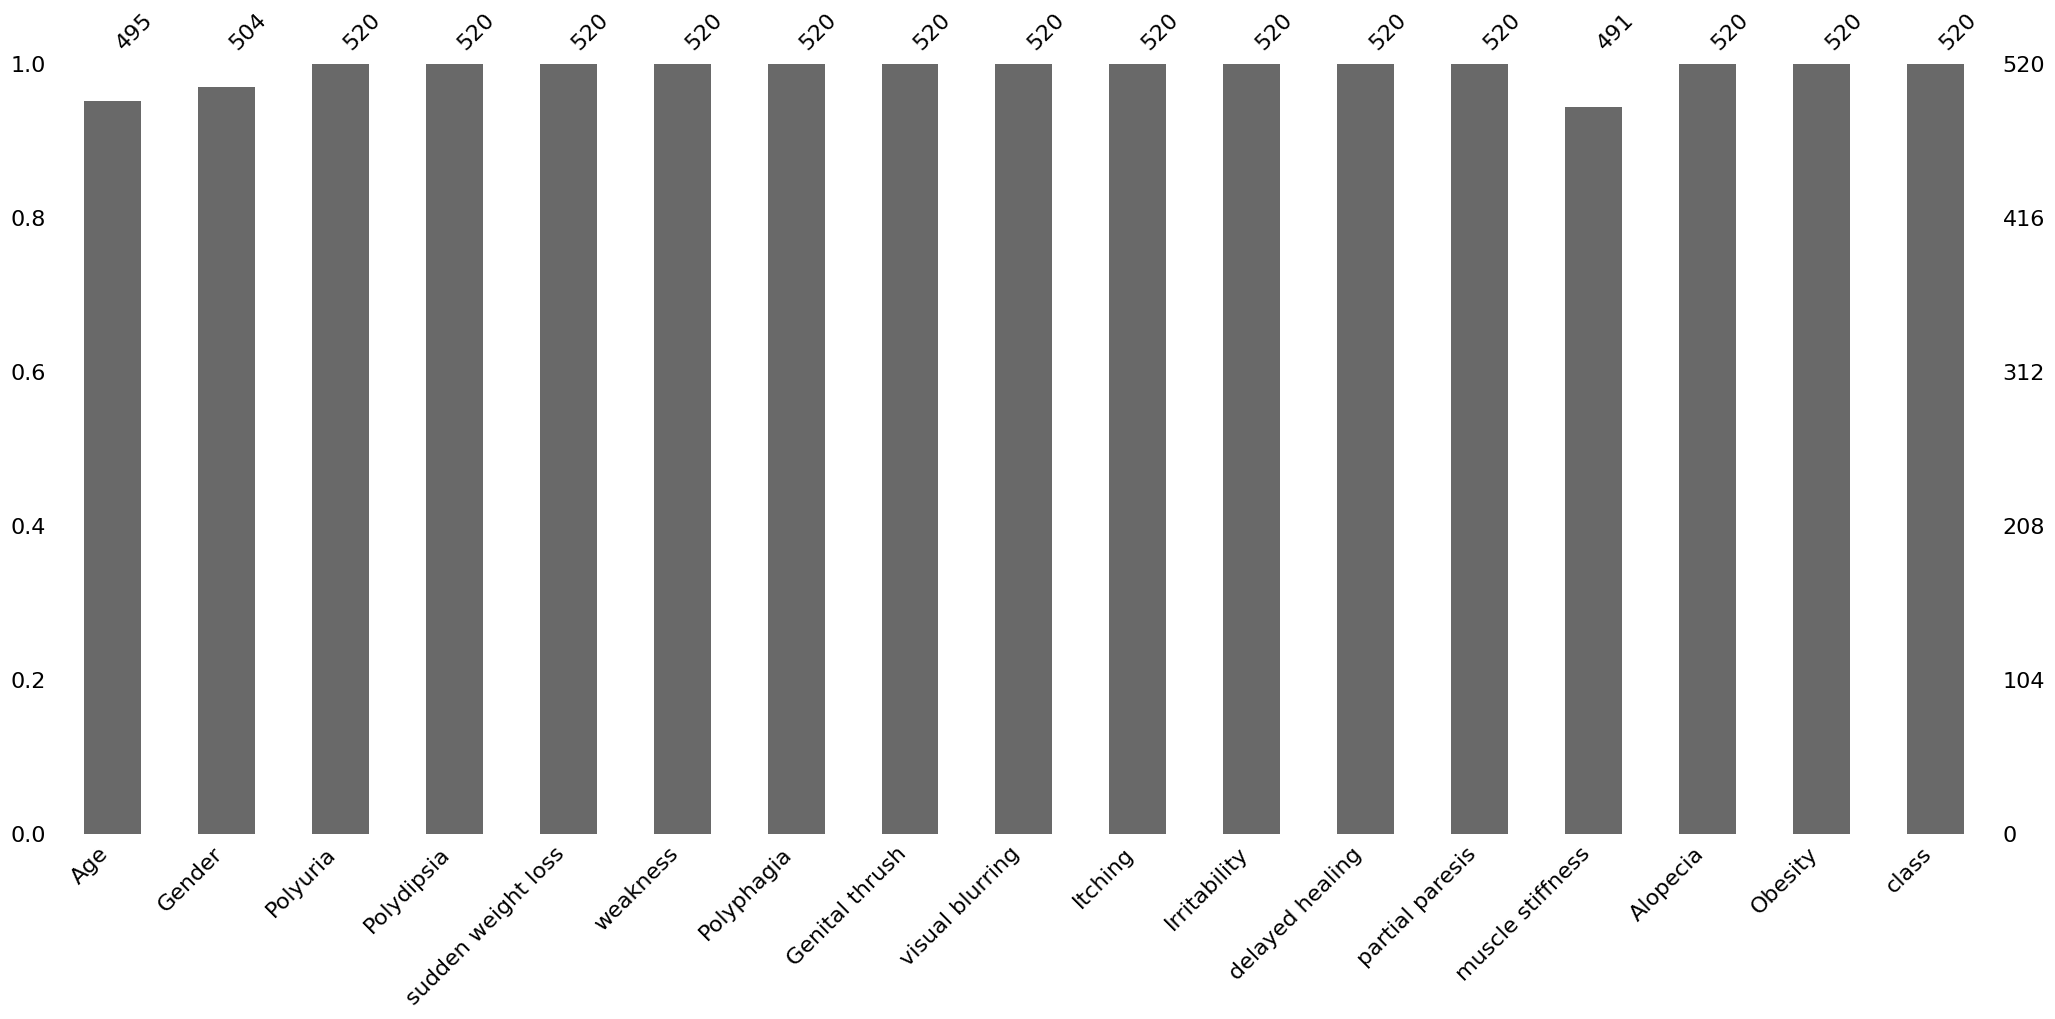

In [12]:
import missingno as msno
msno.bar(df)

In [13]:
df.describe()

,Age
count,495.000000
mean,48.008081
std,12.308778
min,16.000000
25%,38.000000
50%,47.000000
75%,57.000000
max,90.000000


In [14]:
med_val = df['Age'].median()

df['Age'] = df['Age'].fillna(med_val)
df.isnull().sum()

,0
Age,0
Gender,16
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [15]:
med_val = df['Gender'].mode()[0]

df['Gender'] = df['Gender'].fillna(med_val)
df.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [16]:
med_val = df['muscle stiffness'].mode()[0]

df['muscle stiffness'] = df['muscle stiffness'].fillna(med_val)
df.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


<Axes: >

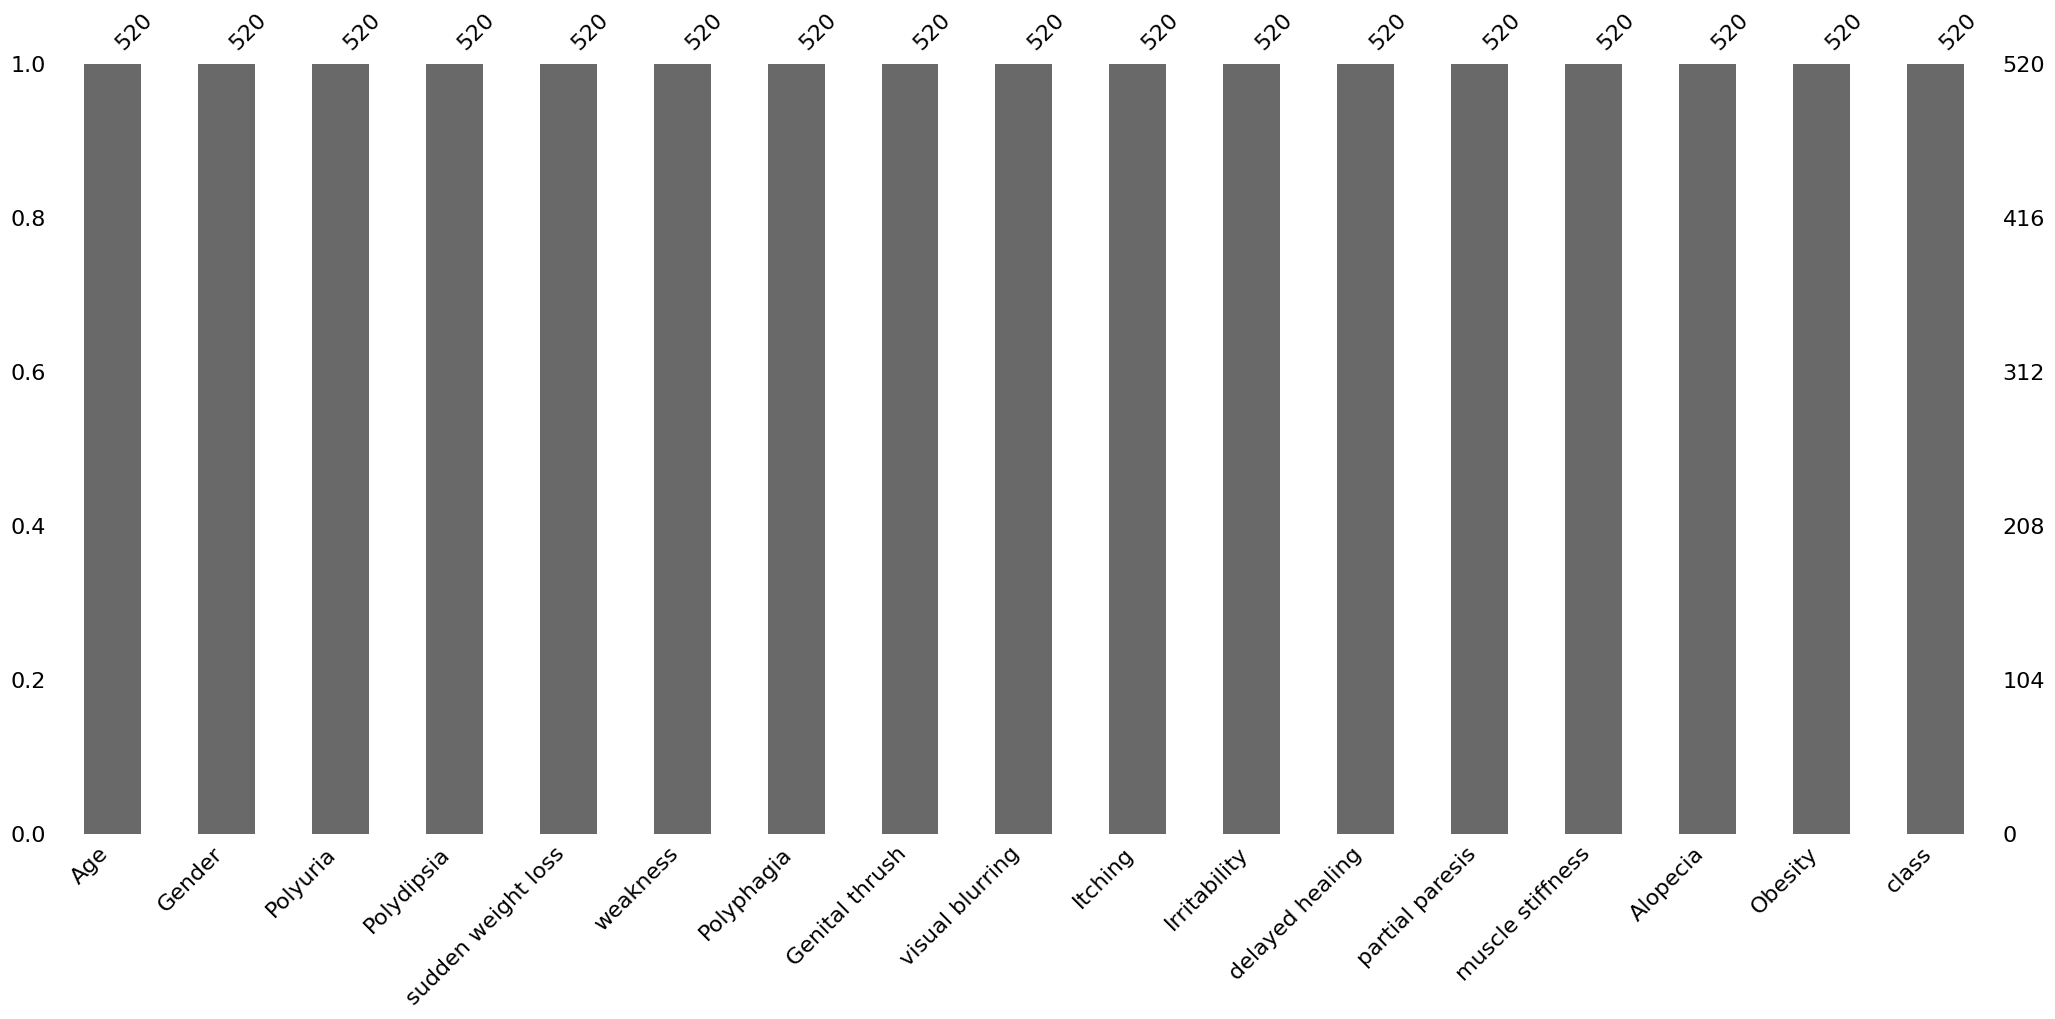

In [17]:
import missingno as msno
msno.bar(df)

In [18]:
df_c = df.copy()

In [19]:
find = df_c['Gender'].unique()
print(find.size)
print(find)

2
['Male' 'Female']


In [20]:
gender_mapping = {'Female': 0, 'Male': 1 }
df_c['Gender'] = df_c['Gender'].map(gender_mapping)

In [21]:
find = df_c['Polyuria'].unique()
print(find.size)
print(find)

2
['No' 'Yes']


In [22]:
Polyuria_mapping = {'No': 0, 'Yes': 1 }
df_c['Polyuria'] = df_c['Polyuria'].map(Polyuria_mapping)



In [23]:
find = df_c['Polydipsia'].unique()
print(find.size)
print(find)

2
['Yes' 'No']


In [24]:
Polydipsia_mapping = {'No': 0, 'Yes': 1 }
df_c['Polydipsia'] = df_c['Polydipsia'].map(Polydipsia_mapping)

In [25]:
find = df_c['sudden weight loss'].unique()
print(find.size)
print(find)

2
['No' 'Yes']


In [26]:
sudden_mapping = {'No': 0, 'Yes': 1 }
df_c['sudden weight loss'] = df_c['sudden weight loss'].map(sudden_mapping)

In [27]:
find = df_c['weakness'].unique()
print(find.size)
print(find)

2
['Yes' 'No']


In [28]:
weakness_mapping = {'No': 0, 'Yes': 1 }
df_c['weakness'] = df_c['weakness'].map(weakness_mapping)

In [29]:
find = df_c['Polyphagia'].unique()
print(find.size)
print(find)

2
['No' 'Yes']


In [30]:
Polyphagia_mapping = {'No': 0, 'Yes': 1 }
df_c['Polyphagia'] = df_c['Polyphagia'].map(Polyphagia_mapping)

In [31]:
find = df_c['Genital thrush'].unique()
print(find.size)
print(find)

2
['No' 'Yes']


In [32]:
Genital_mapping = {'No': 0, 'Yes': 1 }
df_c['Genital thrush'] = df_c['Genital thrush'].map(Genital_mapping)

In [33]:
find = df_c['visual blurring'].unique()
print(find.size)
print(find)

2
['No' 'Yes']


In [34]:
visual_mapping = {'No': 0, 'Yes': 1 }
df_c['visual blurring'] = df_c['visual blurring'].map(visual_mapping)

In [35]:
find = df_c['Itching'].unique()
print(find.size)
print(find)

2
['Yes' 'No']


In [36]:
Itching_mapping = {'No': 0, 'Yes': 1 }
df_c['Itching'] = df_c['Itching'].map(Itching_mapping)

In [37]:
find = df_c['Irritability'].unique()
print(find.size)
print(find)

2
['No' 'Yes']


In [38]:
Irritability_mapping = {'No': 0, 'Yes': 1 }
df_c['Irritability'] = df_c['Irritability'].map(Irritability_mapping)

In [39]:
find = df_c['delayed healing'].unique()
print(find.size)
print(find)

2
['Yes' 'No']


In [40]:
delayed_mapping = {'No': 0, 'Yes': 1 }
df_c['delayed healing'] = df_c['delayed healing'].map(delayed_mapping)

In [41]:
find = df_c['partial paresis'].unique()
print(find.size)
print(find)

2
['No' 'Yes']


In [42]:
partial_mapping = {'No': 0, 'Yes': 1 }
df_c['partial paresis'] = df_c['partial paresis'].map(partial_mapping)

In [43]:
find = df_c['muscle stiffness'].unique()
print(find.size)
print(find)

2
['Yes' 'No']


In [44]:
muscle_mapping = {'No': 0, 'Yes': 1 }
df_c['muscle stiffness'] = df_c['muscle stiffness'].map(muscle_mapping)

In [45]:
find = df_c['Alopecia'].unique()
print(find.size)
print(find)

2
['Yes' 'No']


In [46]:
Alopecia_mapping = {'No': 0, 'Yes': 1 }
df_c['Alopecia'] = df_c['Alopecia'].map(Alopecia_mapping)

In [47]:
find = df_c['Obesity'].unique()
print(find.size)
print(find)

2
['Yes' 'No']


In [48]:
Obesity_mapping = {'No': 0, 'Yes': 1 }
df_c['Obesity'] = df_c['Obesity'].map(Obesity_mapping)

In [49]:
find = df_c['class'].unique()
print(find.size)
print(find)

2
['Positive' 'Negative']


In [50]:
class_mapping = {'Positive': 0, 'Negative': 1 }
df_c['class'] = df_c['class'].map(class_mapping)

In [51]:
print(df_c.dtypes)

Age                   float64
Gender                  int64
Polyuria                int64
Polydipsia              int64
sudden weight loss      int64
weakness                int64
Polyphagia              int64
Genital thrush          int64
visual blurring         int64
Itching                 int64
Irritability            int64
delayed healing         int64
partial paresis         int64
muscle stiffness        int64
Alopecia                int64
Obesity                 int64
class                   int64
dtype: object


In [52]:
df_c

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0
1,58.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41.0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0
3,45.0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0
4,60.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,0
516,48.0,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,0
517,58.0,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,0
518,32.0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1


In [53]:
correlation = df_c.corr()
correlation

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,0.062779,0.195348,0.135812,0.062001,0.230196,0.309755,0.099202,0.411362,0.296996,0.209496,0.257802,0.234989,0.325888,0.319525,0.128467,-0.103745
Gender,0.062779,1.000000,-0.250755,-0.291644,-0.259027,-0.118197,-0.207142,0.195575,-0.210869,-0.056180,-0.010997,-0.096489,-0.310750,-0.093828,0.310136,-0.007417,0.430617
Polyuria,0.195348,-0.250755,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.130244,-0.144192,0.126567,-0.665922
Polydipsia,0.135812,-0.291644,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.178559,-0.310964,0.098691,-0.648734
sudden weight loss,0.062001,-0.259027,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.096107,-0.202727,0.169294,-0.436568
weakness,0.230196,-0.118197,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.265021,0.090490,0.045665,-0.243275
Polyphagia,0.309755,-0.207142,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.311993,-0.053498,0.029785,-0.342504
Genital thrush,0.099202,0.195575,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.108735,0.204847,0.053828,-0.110288
visual blurring,0.411362,-0.210869,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.428961,0.014604,0.109005,-0.251300
Itching,0.296996,-0.056180,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.224951,0.266506,0.001894,0.013384


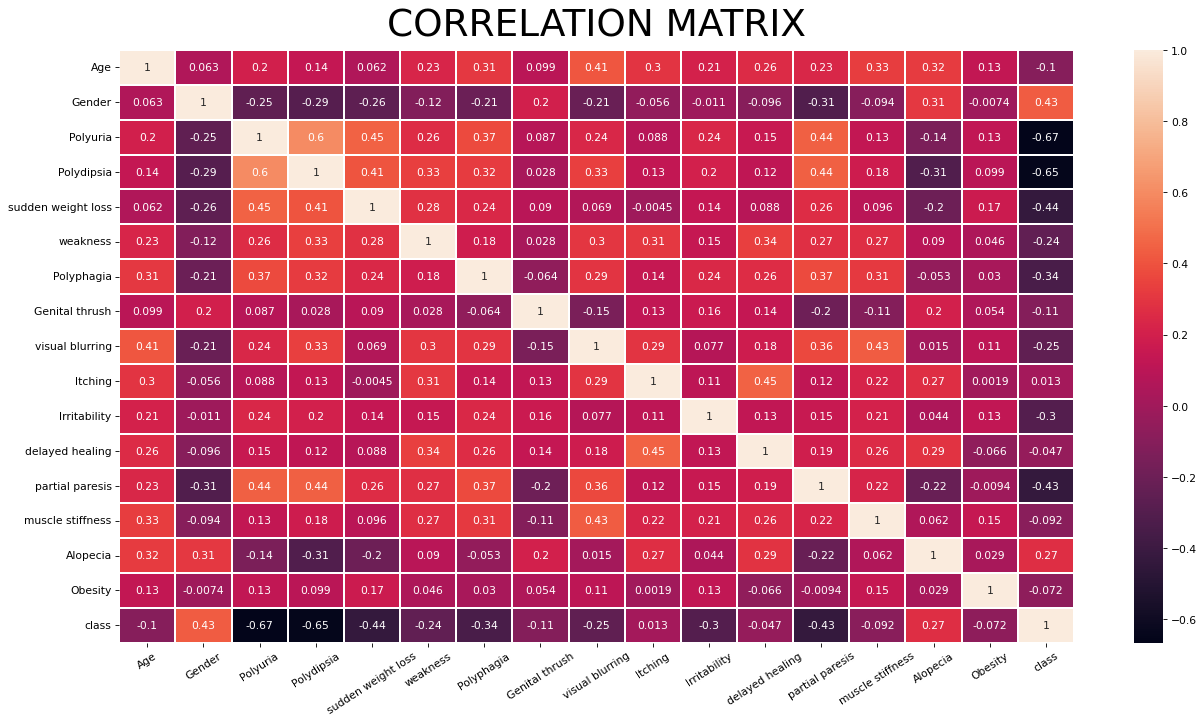

In [54]:
plt.figure(figsize=(20,10), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=35, pad=13)
plt.xticks(rotation=33)
plt.show()

**#Classification of Machine learning:**

**Support vector machine**

In [55]:
X = df_c[['Age','Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity']]
y = df_c[['class']]

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state=42)

# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=42)

In [58]:
y_pred = model.predict(X_test)

print(y_pred)

[1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1]


In [59]:
y_pred = model.predict(X_test)

print(y_pred)

[1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1]


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.8942307692307693
Precision: 0.8235294117647058
Recall (Sensitivity): 0.8484848484848485
F1-Score: 0.835820895522388


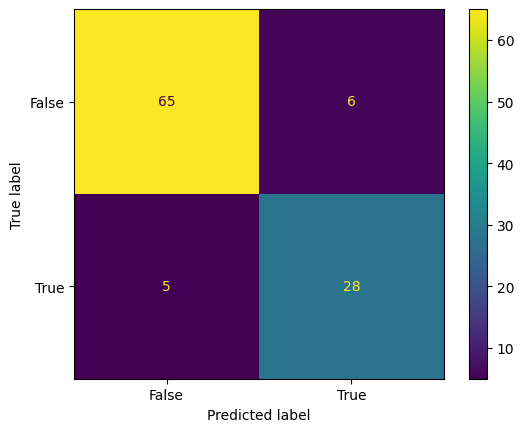

In [61]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [62]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_dt = clf.predict(X_test)

In [63]:
score = clf.score(X_train, y_train)
print(score)

1.0


In [64]:
score = clf.score(X_test, y_test)
print(score)

0.9519230769230769


In [65]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)
# Calculate precision
precision = precision_score(y_test, y_pred_dt)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred_dt)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_dt)
print("F1-Score:", f1)

Accuracy: 0.9519230769230769
Precision: 0.8888888888888888
Recall (Sensitivity): 0.9696969696969697
F1-Score: 0.927536231884058


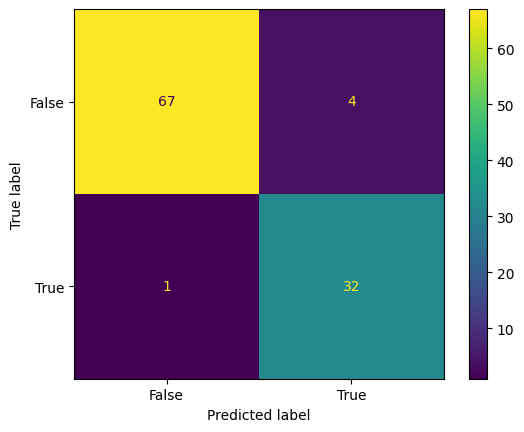

In [66]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# **Exploratory Data Analysis (EDA) After Preprossesing:**

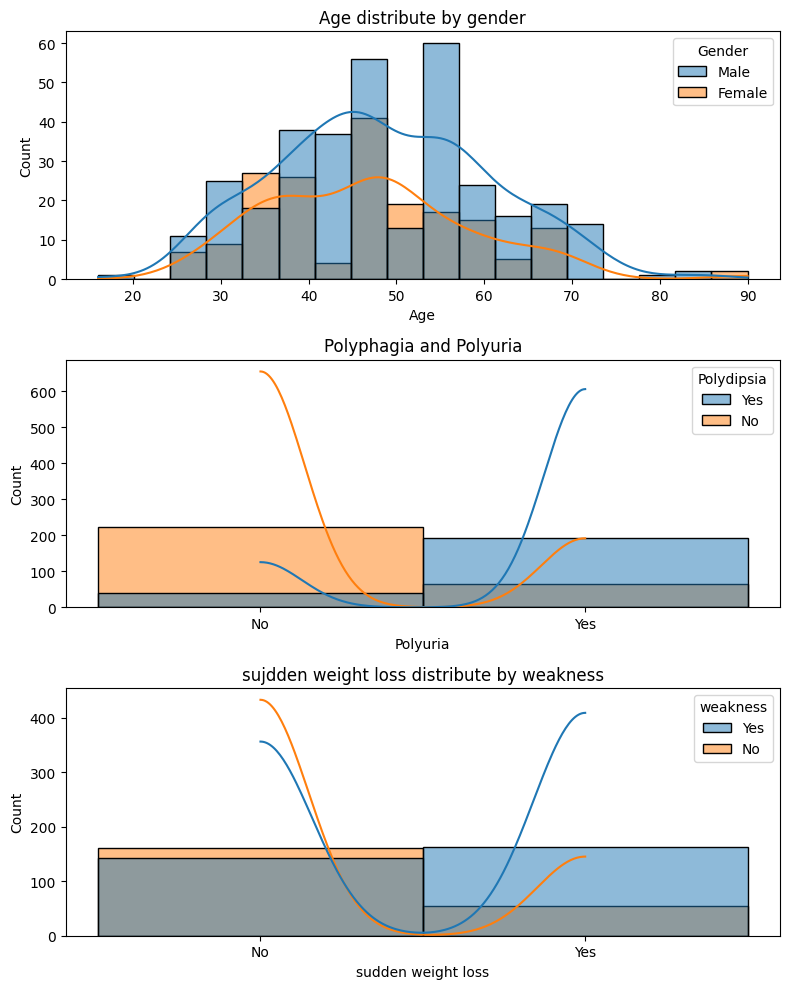

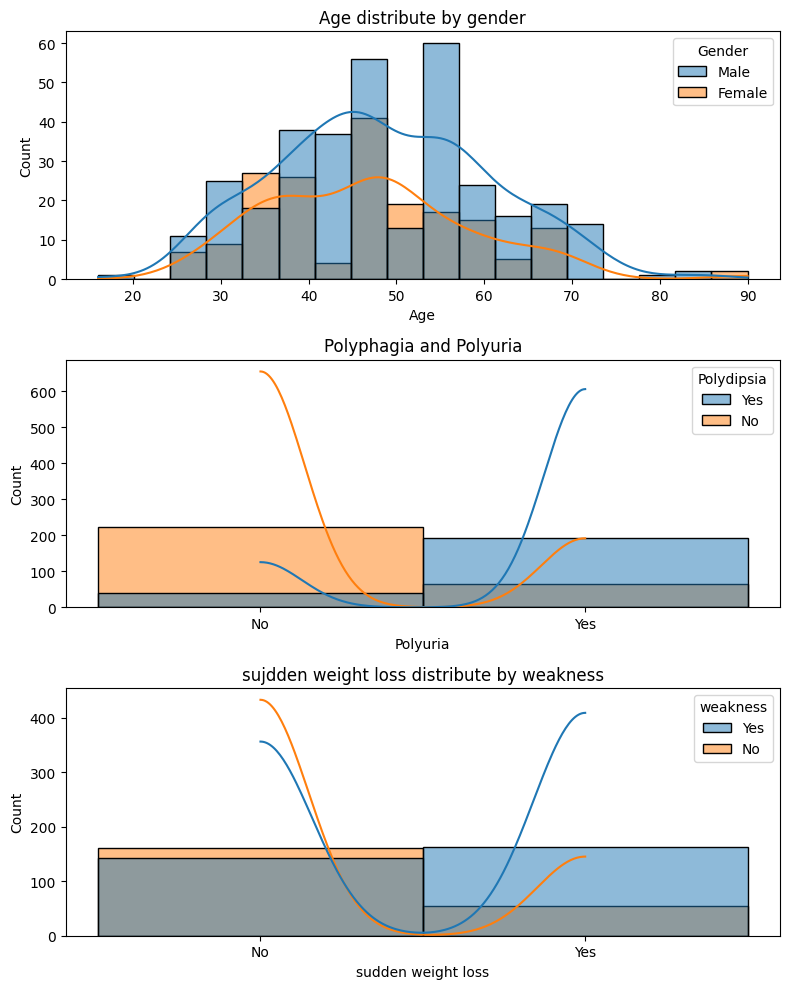

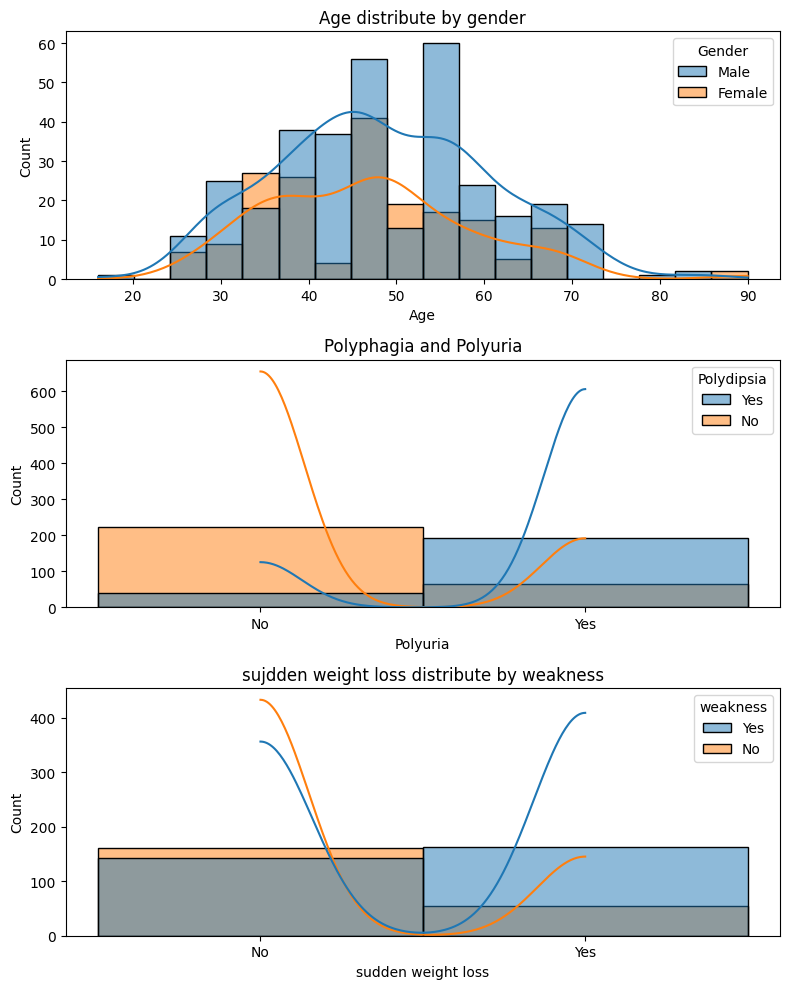

In [70]:
# Histplot of gender, smoking_history, and diabetes (categorical columns)
plt.figure(figsize=(8, 10))

# Plot for gender
plt.subplot(3, 1, 1)
sns.histplot(df, x='Age', hue='Gender', kde=True)
plt.title('Age distribute by gender')

# Plot for smoking_history
plt.subplot(3, 1, 2)
sns.histplot(df, x='Polyuria', hue='Polydipsia', kde=True)
plt.title('Polyphagia and Polyuria')

# Plot for diabetes status
plt.subplot(3, 1, 3)
sns.histplot(df, x='sudden weight loss', hue='weakness', kde=True)
plt.title('sujdden weight loss distribute by weakness')

# Show plots
plt.tight_layout()
plt.show()



# Histplot of gender, smoking_history, and diabetes (categorical columns)
plt.figure(figsize=(8, 10))

# Plot for gender
plt.subplot(3, 1, 1)
sns.histplot(df, x='Age', hue='Gender', kde=True)
plt.title('Age distribute by gender')

# Plot for smoking_history
plt.subplot(3, 1, 2)
sns.histplot(df, x='Polyuria', hue='Polydipsia', kde=True)
plt.title('Polyphagia and Polyuria')

# Plot for diabetes status
plt.subplot(3, 1, 3)
sns.histplot(df, x='sudden weight loss', hue='weakness', kde=True)
plt.title('sujdden weight loss distribute by weakness')

# Show plots
plt.tight_layout()
plt.show()


# Histplot of gender, smoking_history, and diabetes (categorical columns)
plt.figure(figsize=(8, 10))

# Plot for gender
plt.subplot(3, 1, 1)
sns.histplot(df, x='Age', hue='Gender', kde=True)
plt.title('Age distribute by gender')

# Plot for smoking_history
plt.subplot(3, 1, 2)
sns.histplot(df, x='Polyuria', hue='Polydipsia', kde=True)
plt.title('Polyphagia and Polyuria')

# Plot for diabetes status
plt.subplot(3, 1, 3)
sns.histplot(df, x='sudden weight loss', hue='weakness', kde=True)
plt.title('sujdden weight loss distribute by weakness')
# Show plots
plt.tight_layout()
plt.show()

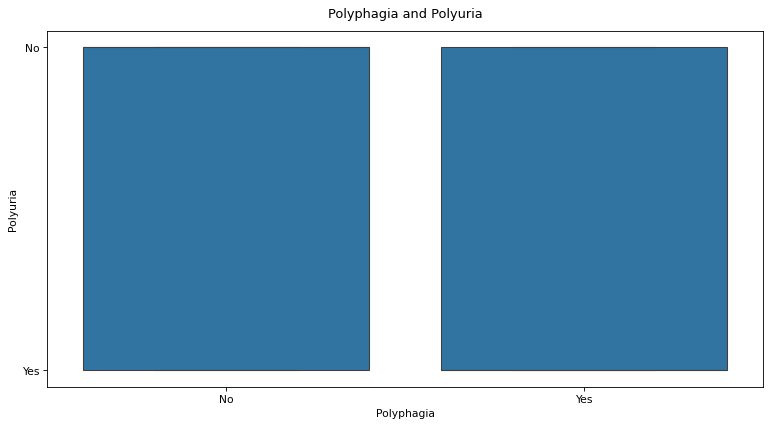

In [69]:
plt.figure(figsize=(12,6), dpi=77)
sns.boxplot(x="Polyphagia", y="Polyuria", data=df)
plt.title('Polyphagia and Polyuria', pad=13)
plt.xlabel('Polyphagia')
plt.ylabel('Polyuria')
plt.show()


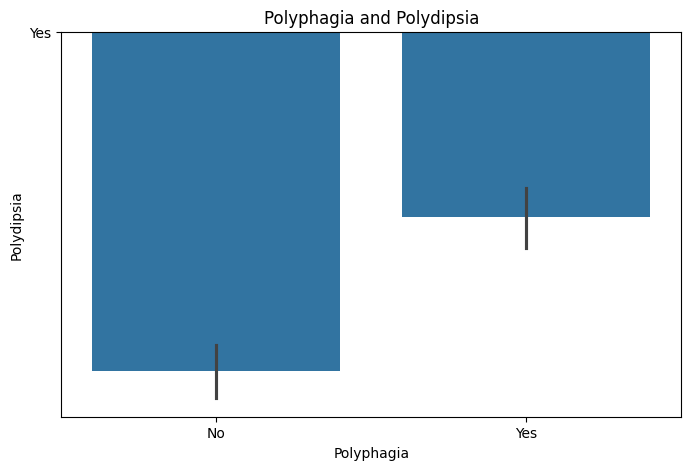

In [80]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Polyphagia', y='Polydipsia', data=df)  # Change columns
plt.title('Polyphagia and Polydipsia')
plt.xlabel('Polyphagia')
plt.ylabel('Polydipsia')
plt.show()

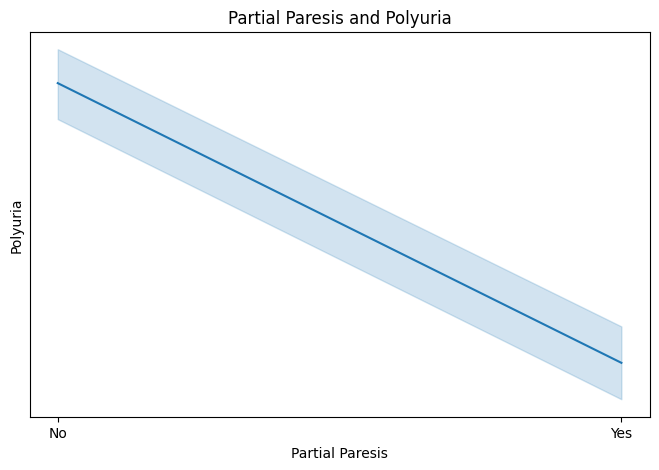

In [74]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='partial paresis', y='Polyuria', data=df)  # Change columns
plt.title('Partial Paresis and Polyuria')
plt.xlabel('Partial Paresis')
plt.ylabel('Polyuria')
plt.show()


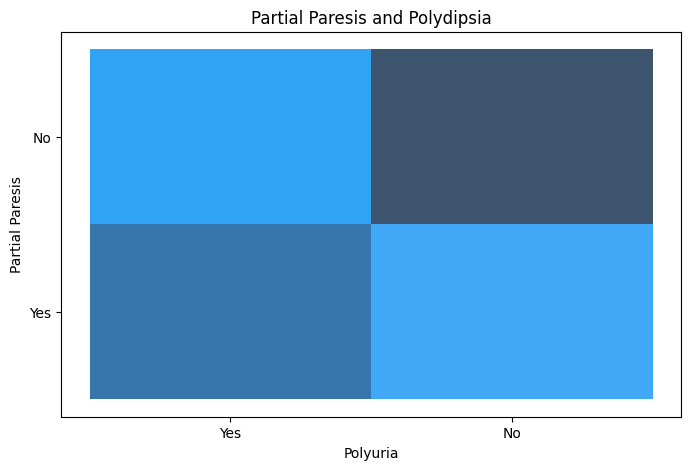

In [78]:
plt.figure(figsize=(8, 5))
sns.histplot(y='partial paresis', x='Polydipsia', data=df)  # Change columns
plt.title('Partial Paresis and Polydipsia')
plt.ylabel('Partial Paresis')
plt.xlabel('Polyuria')
plt.show()

   **COMPARISION MODEL:**

In [ ]:
SVM:
Accuracy: 0.8942307692307693
Precision: 0.8235294117647058
Recall (Sensitivity): 0.8484848484848485
F1-Score: 0.835820895522388.

RANDOM FOREST:
Accuracy: 0.9519230769230769
Precision: 0.8888888888888888
Recall (Sensitivity): 0.9696969696969697
F1-Score: 0.927536231884058